In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/vn-quant/Consumer-Behavior-and-Shopping-Habits/R/shopping_behavior_updated.csv')
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [3]:
df.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:


le = LabelEncoder()
for i in df.columns:
  df[i] = le.fit_transform(df[i])
df = df.drop(columns=['Customer ID'])
x = df.drop(columns=['Item Purchased'])
y = df['Item Purchased']

In [6]:
#df.info()

In [6]:
for column in x:
    x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())


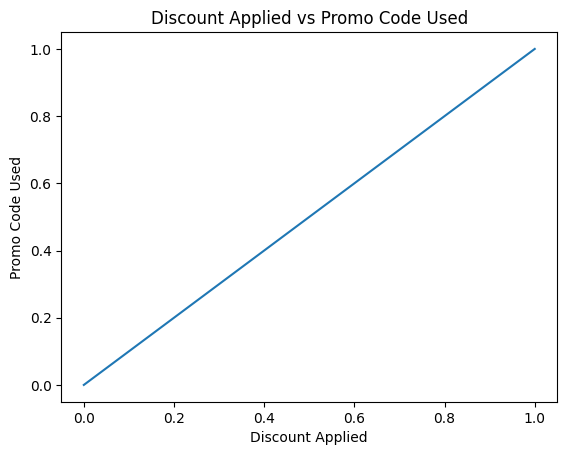

In [7]:
plt.plot(x['Discount Applied'],x['Promo Code Used'])
plt.title("Discount Applied vs Promo Code Used")
plt.xlabel("Discount Applied")
plt.ylabel("Promo Code Used")
plt.show()

KeyboardInterrupt: 

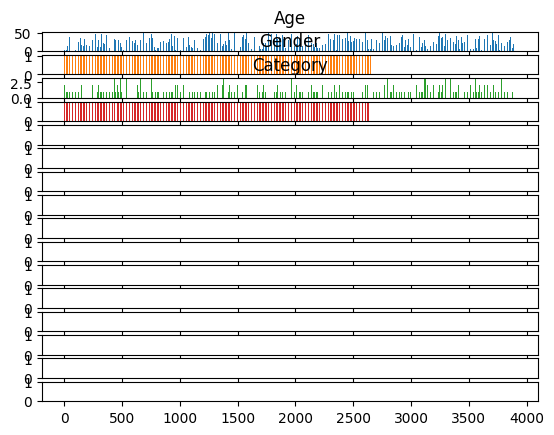

In [26]:
x.plot(kind='bar', subplots=True)
plt.suptitle('Bar Plots')
plt.show()

In [8]:
corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Age,1.000000,0.002763,0.003546,-0.010424,-0.001957,-0.023654,0.006700,-0.028418,-0.021949,0.006492,-0.010743,0.004366,0.004366,0.040445,-0.005215,0.017406
Gender,0.002763,1.000000,-0.004144,-0.014044,0.000747,0.018764,-0.000560,0.016258,0.008164,0.417197,0.016490,0.595823,0.595823,0.035873,0.003369,0.012829
Category,0.003546,-0.004144,1.000000,-0.017841,0.000541,-0.035916,0.009119,0.000141,-0.000299,0.011022,-0.009031,0.000572,0.000572,-0.015669,-0.000776,0.012190
Purchase Amount (USD),-0.010424,-0.014044,-0.017841,1.000000,0.028803,0.027805,-0.004326,-0.018358,0.030776,-0.006996,-0.024637,-0.017798,-0.017798,0.008063,-0.009077,-0.017219
Location,-0.001957,0.000747,0.000541,0.028803,1.000000,0.000275,-0.004944,0.012259,-0.004222,0.004529,-0.001458,0.011926,0.011926,-0.032962,-0.006931,-0.012740
Size,-0.023654,0.018764,-0.035916,0.027805,0.000275,1.000000,-0.005124,-0.009286,0.027603,-0.014501,0.001020,-0.001804,-0.001804,-0.011152,-0.033220,-0.008860
Color,0.006700,-0.000560,0.009119,-0.004326,-0.004944,-0.005124,1.000000,-0.000109,0.027356,0.021333,-0.000034,0.019394,0.019394,0.000418,-0.007578,-0.009938
Season,-0.028418,0.016258,0.000141,-0.018358,0.012259,-0.009286,-0.000109,1.000000,0.000160,-0.005139,0.019122,0.015550,0.015550,0.024333,-0.005520,0.009568
Review Rating,-0.021949,0.008164,-0.000299,0.030776,-0.004222,0.027603,0.027356,0.000160,1.000000,-0.006368,-0.009787,-0.012486,-0.012486,0.004229,0.014404,0.005643
Subscription Status,0.006492,0.417197,0.011022,-0.006996,0.004529,-0.014501,0.021333,-0.005139,-0.006368,1.000000,0.017142,0.700202,0.700202,0.030859,0.015559,0.003601


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [10]:

df.nunique()
#25

Age                       53
Gender                     2
Item Purchased            25
Category                   4
Purchase Amount (USD)     81
Location                  50
Size                       4
Color                     25
Season                     4
Review Rating             26
Subscription Status        2
Shipping Type              6
Discount Applied           2
Promo Code Used            2
Previous Purchases        50
Payment Method             6
Frequency of Purchases     7
dtype: int64

In [11]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes=25)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=25)

y_test.shape

(780, 25)

In [12]:

tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=16))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=25, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
model.fit(x_train, y_train, epochs=40, batch_size=100)

Epoch 1/40
32/32 [==============================] - 0s 4ms/step - loss: 1.3597 - accuracy: 0.5208
Epoch 2/40
32/32 [==============================] - 0s 3ms/step - loss: 1.3662 - accuracy: 0.5189
Epoch 3/40
32/32 [==============================] - 0s 3ms/step - loss: 1.3551 - accuracy: 0.5253
Epoch 4/40
32/32 [==============================] - 0s 3ms/step - loss: 1.3450 - accuracy: 0.5151
Epoch 5/40
32/32 [==============================] - 0s 3ms/step - loss: 1.3303 - accuracy: 0.5333
Epoch 6/40
32/32 [==============================] - 0s 3ms/step - loss: 1.3069 - accuracy: 0.5458
Epoch 7/40
32/32 [==============================] - 0s 4ms/step - loss: 1.2856 - accuracy: 0.5522
Epoch 8/40
32/32 [==============================] - 0s 3ms/step - loss: 1.2885 - accuracy: 0.5542
Epoch 9/40
32/32 [==============================] - 0s 3ms/step - loss: 1.2883 - accuracy: 0.5446
Epoch 10/40
32/32 [==============================] - 0s 6ms/step - loss: 1.2561 - accuracy: 0.5683
Epoch 11/40
32/32 [

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)


25/25 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.6577


In [21]:

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)


accuracy = knn.score(x_test, y_test)
print(f"KNN Accuracy: {accuracy:.4f}")


KNN Accuracy: 0.562


In [22]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)


y_pred_svm = svm.predict(x_test)


accuracy_svm = svm.score(x_test, y_test)
print(f"SVM Accuracy: {accuracy_svm:.4f}")


ValueError: y should be a 1d array, got an array of shape (3120, 25) instead.

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)  # Set an appropriate depth
dt.fit(x_train, y_train)


y_pred_dt = dt.predict(x_test)


accuracy_dt = dt.score(x_test, y_test)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Decision Tree Accuracy: 0.1551


In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7,11,15,19],
    'min_samples_split': [2, 5, 10,14,15,19],
    'min_samples_leaf': [1, 2, 4 ,8,10,14,19]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)



best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")



accuracy = grid_search.score(x_test, y_test)
print(f"Test Accuracy (Grid Search): {accuracy:.4f}")


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Test Accuracy (Grid Search): 0.1500


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=20, cv=7, scoring='accuracy', random_state=30)
random_search.fit(x_train, y_train)


best_params_random = random_search.best_params_
print(f"Best Hyperparameters (Random Search): {best_params_random}")


accuracy_random = random_search.score(x_test, y_test)
print(f"Test Accuracy (Random Search): {accuracy_random:.4f}")


Best Hyperparameters (Random Search): {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 19}
Test Accuracy (Random Search): 0.1551
